In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [105]:
df=pd.read_csv("Bangladesh_Peopulation - Sheet1.csv")
df.head()


,Date(Year),Population,Annual % Change,Name,Area A (km²),Census_1991,Census_2001,Census_2011,Census _2022
0,1950,39728535,NaN,Barguna,"1,831","775,693","848,554","892,781","1,010,530"
1,1951,40548590,2.06,Barisal,"2,785","2,207,426","2,355,967","2,324,310","2,570,450"
2,1952,41426885,2.17,Bhola,"3,403","1,476,328","1,703,117","1,776,795","1,932,514"
3,1953,42329279,2.18,Jhalakati,707,"666,139","694,231","682,669","661,161"
4,1954,43282032,2.25,Patuakhali,"3,221","1,273,872","1,460,781","1,535,854","1,727,254"


In [106]:
#show  all columns
df.columns

Index(['Date(Year)', 'Population', 'Annual % Change', 'Name', 'Area A (km²)',
       ' Census_1991', 'Census_2001', ' Census_2011', ' Census _2022'],
      dtype='object')

In [107]:


# Create the DataFrame df1 with the first three columns
df1 = df.iloc[:, :3]
df.fillna(0, inplace=True)


df1.head()


,Date(Year),Population,Annual % Change
0,1950,39728535,NaN
1,1951,40548590,2.06
2,1952,41426885,2.17
3,1953,42329279,2.18
4,1954,43282032,2.25


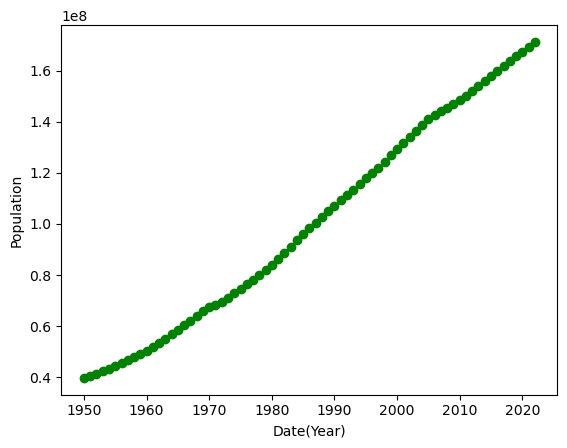

In [114]:


plt.scatter(df['Date(Year)'], df['Population'], color='green')
plt.xlabel("Date(Year)")
plt.ylabel("Population")
plt.show()


C:\Users\kazit\AppData\Local\Temp\ipykernel_17592\281173424.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


Enter Year: 2030
Predicted population for year 2030
Predicted population: 186018699
Accuracy percentage: 99.44845544249766


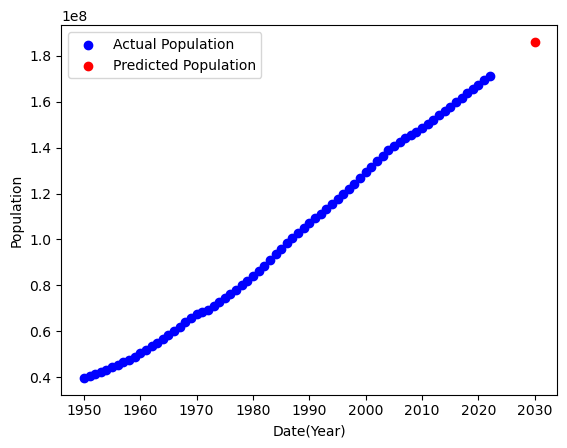

In [121]:


# Read the CSV file into DataFrame
df = pd.read_csv("Bangladesh_Peopulation - Sheet1.csv")

# Replace NaN values with the mean
df.fillna(df.mean(), inplace=True)


X = df[['Date(Year)']]  # Independent variable (Year)
y = df['Population']  # Dependent variable (Population)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Input the year for which you want to predict the population
year = int(input("Enter Year: "))
input_data = pd.DataFrame({'Date(Year)': [year]})

# Predict the population for the given year
predicted_population = model.predict(input_data)

print("Predicted population for year", year )

print("Predicted population:", int(predicted_population))

# Calculate the R-squared score (accuracy) of the model
accuracy = model.score(X, y) * 100


print("Accuracy percentage:", accuracy)


# Scatter plot
plt.scatter(df['Date(Year)'], df['Population'], color='blue', label='Actual Population')
plt.scatter(year, predicted_population, color='red', label='Predicted Population')
plt.xlabel("Date(Year)")
plt.ylabel("Population")
plt.legend()
plt.show()


